# Sentiment Analysis

What is sentiment analysis, it is primarily the way through which the emotion within a text can be interpreted and hence classified. Thus, in the machine learning terms we can say that it is a classification problem which the the output is going to be discrete values.
Here, in the case of Twitter Sentiment Analysis, we are going to analysis the text and interpret whether the emotion underlysis is Positive, Negative or Neutral.

# Importing predefined libraries

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import importlib
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

# Importing self-made modules

In [222]:
import dictionaries
importlib.reload(dictionaries)
import evaluating
importlib.reload(evaluating)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<module 'evaluating' from 'C:\\Users\\asus\\Desktop\\AI-ML_Month_Major_Project\\evaluating.py'>

**dictionaries.py** : Contains 
1. A list of stopwords that need to be removed in order to make sure that they do not appear as the most important words in our algo due to their large frequency.
2. A dictionary to replace emojis with words corresponding to their meaning.
3. A function called **preprocess(textdata)** which performs preprocessing of data
4. A function **vectorizes(X_train, y_train)** to create the TF-IDF matrix for the tweets
5. A function **predict(model, text)** to make predictions based on a particular model

**evaluating.py** : Contains function **EvaluatingModel(model-name,x_test,y_test,font)** that evaluates the model passed to it based on the testing data provided and generates a table containing precision, recall and f1-score. It also generates a confusion matrix.

In [172]:
font = {'family': 'serif',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }

# Reading Data

In [173]:
df = pd.read_csv('TwitterSentimentAnalysisDataset.csv',encoding='windows-1252',names=['Target','ID','Date','Flag','User','Text'])

# Exploratory Data Analysis

In [174]:
df.shape

(1600000, 6)

In [175]:
df.head()

,Target,ID,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [176]:
df.sample(n=10,random_state=15)

,Target,ID,Date,Flag,User,Text
561460,0,2205426244,Wed Jun 17 04:42:48 PDT 2009,NO_QUERY,BurntCaramel,@mjsluijs Nah.. Most of the antivirus program...
1570185,4,2188543728,Mon Jun 15 22:05:33 PDT 2009,NO_QUERY,gab_iii,@zacseif fly to arizona and we'll have video g...
58096,0,1685820960,Sun May 03 02:15:21 PDT 2009,NO_QUERY,NoSheds,@stephenfry I think you killed mobypic - Site ...
283874,0,1993027493,Mon Jun 01 09:42:50 PDT 2009,NO_QUERY,carebearrr,@mileycyrus and we're gonna miss you guys so ...
34009,0,1564669484,Mon Apr 20 04:29:22 PDT 2009,NO_QUERY,timaree,so tired this morning
801000,4,1468005634,Mon Apr 06 23:13:16 PDT 2009,NO_QUERY,MerCleve,@matt_the_great forget the rest...You need to ...
1066153,4,1965220208,Fri May 29 15:32:16 PDT 2009,NO_QUERY,jemcsh,"@tommcfly ur prince harry came to the usa, so ..."
796932,0,2327967353,Thu Jun 25 09:00:32 PDT 2009,NO_QUERY,evestirling,"@DrJoolz thanks, I went there before...it does..."
1345228,4,2043955672,Fri Jun 05 08:39:37 PDT 2009,NO_QUERY,jclanger,change of plans sims party tonight and then t...
415064,0,2060975737,Sat Jun 06 19:56:30 PDT 2009,NO_QUERY,Valv30,@Twisted4Jordan I am sad bout that. But this ...


In [177]:
df.columns

Index(['Target', 'ID', 'Date', 'Flag', 'User', 'Text'], dtype='object')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1600000 non-null  int64 
 1   ID      1600000 non-null  int64 
 2   Date    1600000 non-null  object
 3   Flag    1600000 non-null  object
 4   User    1600000 non-null  object
 5   Text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [179]:
df['Flag'].nunique()

1

Dropping 'Flag' column as it has the same value for all records

In [180]:
df = df.drop('Flag',axis=1)

In [181]:
df

,Target,ID,Date,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [182]:
df.dtypes

Target     int64
ID         int64
Date      object
User      object
Text      object
dtype: object

In [183]:
df['Date'].head()

0    Mon Apr 06 22:19:45 PDT 2009
1    Mon Apr 06 22:19:49 PDT 2009
2    Mon Apr 06 22:19:53 PDT 2009
3    Mon Apr 06 22:19:57 PDT 2009
4    Mon Apr 06 22:19:57 PDT 2009
Name: Date, dtype: object

In [184]:
df['Date']

0          Mon Apr 06 22:19:45 PDT 2009
1          Mon Apr 06 22:19:49 PDT 2009
2          Mon Apr 06 22:19:53 PDT 2009
3          Mon Apr 06 22:19:57 PDT 2009
4          Mon Apr 06 22:19:57 PDT 2009
                       ...             
1599995    Tue Jun 16 08:40:49 PDT 2009
1599996    Tue Jun 16 08:40:49 PDT 2009
1599997    Tue Jun 16 08:40:49 PDT 2009
1599998    Tue Jun 16 08:40:49 PDT 2009
1599999    Tue Jun 16 08:40:50 PDT 2009
Name: Date, Length: 1600000, dtype: object

Removing time zone as it is same for all records

In [185]:
df['Date'] = df['Date'].str.replace(' PDT 2009','')

In [186]:
df.head()

,Target,ID,Date,User,Text
0,0,1467810369,Mon Apr 06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all...."


In [187]:
df[['Day','Month','Date','Time']]=df['Date'].str.split(pat=" ",expand=True)

In [188]:
df

,Target,ID,Date,User,Text,Day,Month,Time
0,0,1467810369,06,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon,Apr,22:19:45
1,0,1467810672,06,scotthamilton,is upset that he can't update his Facebook by ...,Mon,Apr,22:19:49
2,0,1467810917,06,mattycus,@Kenichan I dived many times for the ball. Man...,Mon,Apr,22:19:53
3,0,1467811184,06,ElleCTF,my whole body feels itchy and like its on fire,Mon,Apr,22:19:57
4,0,1467811193,06,Karoli,"@nationwideclass no, it's not behaving at all....",Mon,Apr,22:19:57
...,...,...,...,...,...,...,...,...
1599995,4,2193601966,16,AmandaMarie1028,Just woke up. Having no school is the best fee...,Tue,Jun,08:40:49
1599996,4,2193601969,16,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,Tue,Jun,08:40:49
1599997,4,2193601991,16,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Tue,Jun,08:40:49
1599998,4,2193602064,16,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Tue,Jun,08:40:49


In [189]:
df = df.drop('Date',axis=1)

In [190]:
df

,Target,ID,User,Text,Day,Month,Time
0,0,1467810369,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon,Apr,22:19:45
1,0,1467810672,scotthamilton,is upset that he can't update his Facebook by ...,Mon,Apr,22:19:49
2,0,1467810917,mattycus,@Kenichan I dived many times for the ball. Man...,Mon,Apr,22:19:53
3,0,1467811184,ElleCTF,my whole body feels itchy and like its on fire,Mon,Apr,22:19:57
4,0,1467811193,Karoli,"@nationwideclass no, it's not behaving at all....",Mon,Apr,22:19:57
...,...,...,...,...,...,...,...
1599995,4,2193601966,AmandaMarie1028,Just woke up. Having no school is the best fee...,Tue,Jun,08:40:49
1599996,4,2193601969,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,Tue,Jun,08:40:49
1599997,4,2193601991,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Tue,Jun,08:40:49
1599998,4,2193602064,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Tue,Jun,08:40:49


It can be seen that there are only two distinct labels 0 and 4

In [191]:
df['Target'].unique()

array([0, 4], dtype=int64)

It can be seen that Target=0 represents negative(sad,upset,angry etc.) tweets

In [192]:
df[df['Target']==0].head(10)

,Target,ID,User,Text,Day,Month,Time
0,0,1467810369,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon,Apr,22:19:45
1,0,1467810672,scotthamilton,is upset that he can't update his Facebook by ...,Mon,Apr,22:19:49
2,0,1467810917,mattycus,@Kenichan I dived many times for the ball. Man...,Mon,Apr,22:19:53
3,0,1467811184,ElleCTF,my whole body feels itchy and like its on fire,Mon,Apr,22:19:57
4,0,1467811193,Karoli,"@nationwideclass no, it's not behaving at all....",Mon,Apr,22:19:57
5,0,1467811372,joy_wolf,@Kwesidei not the whole crew,Mon,Apr,22:20:00
6,0,1467811592,mybirch,Need a hug,Mon,Apr,22:20:03
7,0,1467811594,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,Mon,Apr,22:20:03
8,0,1467811795,2Hood4Hollywood,@Tatiana_K nope they didn't have it,Mon,Apr,22:20:05
9,0,1467812025,mimismo,@twittera que me muera ?,Mon,Apr,22:20:09


While Target=4 represents positive tweets

In [193]:
df[df['Target']!=0].head(10)

,Target,ID,User,Text,Day,Month,Time
800000,4,1467822272,ersle,I LOVE @Health4UandPets u guys r the best!!,Mon,Apr,22:22:45
800001,4,1467822273,becca210,im meeting up with one of my besties tonight! ...,Mon,Apr,22:22:45
800002,4,1467822283,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",Mon,Apr,22:22:46
800003,4,1467822287,katarinka,Being sick can be really cheap when it hurts t...,Mon,Apr,22:22:46
800004,4,1467822293,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,Mon,Apr,22:22:46
800005,4,1467822391,ajarofalmonds,@ProductOfFear You can tell him that I just bu...,Mon,Apr,22:22:47
800006,4,1467822447,vmdavinci,@r_keith_hill Thans for your response. Ihad al...,Mon,Apr,22:22:51
800007,4,1467822465,jessicavaliyi,"@KeepinUpWKris I am so jealous, hope you had a...",Mon,Apr,22:22:48
800008,4,1467822489,emmasaur28,"@tommcfly ah, congrats mr fletcher for finally...",Mon,Apr,22:22:49
800009,4,1467822496,SherylBreuker,@e4VoIP I RESPONDED Stupid cat is helping me ...,Mon,Apr,22:22:49


Keeping only necessary data and discarding the rest

In [194]:
df = df[['Target','User','Text','Day']]

In [195]:
df

,Target,User,Text,Day
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon
1,0,scotthamilton,is upset that he can't update his Facebook by ...,Mon
2,0,mattycus,@Kenichan I dived many times for the ball. Man...,Mon
3,0,ElleCTF,my whole body feels itchy and like its on fire,Mon
4,0,Karoli,"@nationwideclass no, it's not behaving at all....",Mon
...,...,...,...,...
1599995,4,AmandaMarie1028,Just woke up. Having no school is the best fee...,Tue
1599996,4,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,Tue
1599997,4,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Tue
1599998,4,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Tue


Replacing label '4' with one as there is no need of keeping it as such since their are no neutral tweets with label = 2

In [196]:
df['Target']=df['Target'].replace(4,1)

C:\Users\asus\AppData\Local\Temp\ipykernel_14052\1862341194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target']=df['Target'].replace(4,1)


In [197]:
df[df['Target']!=0].head(10)

,Target,User,Text,Day
800000,1,ersle,I LOVE @Health4UandPets u guys r the best!!,Mon
800001,1,becca210,im meeting up with one of my besties tonight! ...,Mon
800002,1,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",Mon
800003,1,katarinka,Being sick can be really cheap when it hurts t...,Mon
800004,1,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,Mon
800005,1,ajarofalmonds,@ProductOfFear You can tell him that I just bu...,Mon
800006,1,vmdavinci,@r_keith_hill Thans for your response. Ihad al...,Mon
800007,1,jessicavaliyi,"@KeepinUpWKris I am so jealous, hope you had a...",Mon
800008,1,emmasaur28,"@tommcfly ah, congrats mr fletcher for finally...",Mon
800009,1,SherylBreuker,@e4VoIP I RESPONDED Stupid cat is helping me ...,Mon


In [198]:
df

,Target,User,Text,Day
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon
1,0,scotthamilton,is upset that he can't update his Facebook by ...,Mon
2,0,mattycus,@Kenichan I dived many times for the ball. Man...,Mon
3,0,ElleCTF,my whole body feels itchy and like its on fire,Mon
4,0,Karoli,"@nationwideclass no, it's not behaving at all....",Mon
...,...,...,...,...
1599995,1,AmandaMarie1028,Just woke up. Having no school is the best fee...,Tue
1599996,1,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,Tue
1599997,1,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Tue
1599998,1,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Tue


Converting 'Text' and 'Target columns' to lists for preprocessing

In [199]:
text, labels = list(df['Text']), list(df['Target'])

# Preprocessing the data to make it fit for the models

Preprocessing involves:
1. Lower Casing: Each text is converted to lowercase. #Helps to keep things normalized
2. Replacing URLs: Links starting with "http" or "https" or "www" are replaced by "URL".
3. Replacing Emojis: Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. (eg: ":)" to "EMOJIsmile")
4. Replacing Usernames: Replace @Usernames with word "USER". (eg: "@Kaggle" to "USER")
5. Removing Non-Alphabets: Replacing characters except Digits and Alphabets with a space.
6. Removing Consecutive letters: 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")
7. Removing Short Words: Words with length less than 2 are removed.
8. Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
9. Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “Great” to “Good”)

In [200]:
preprocessedtext = dictionaries.preprocess(text)

# Splitting Data into training and testing samples

In [201]:
X_train, X_test, y_train, y_test = train_test_split(preprocessedtext, sentiment, test_size = 0.05, random_state = 0)

# Converting the text data into a TF-IDF matrix

TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.

This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

It has many uses, most importantly in automated text analysis, and is very useful for scoring words in machine learning algorithms for Natural Language Processing (NLP).

TF-IDF was invented for document search and information retrieval. It works by increasing proportionally to the number of times a word appears in a document, but is offset by the number of documents that contain the word. So, words that are common in every document, such as this, what, and if, rank low even though they may appear many times, since they don’t mean much to that document in particular.

1. The term frequency of a word in a document. There are several ways of calculating this frequency, with the simplest being a raw count of instances a word appears in a document. Then, there are ways to adjust the frequency, by length of a document, or by the raw frequency of the most frequent word in a document.
2. The inverse document frequency of the word across a set of documents. This means, how common or rare a word is in the entire document set. The closer it is to 0, the more common a word is. This metric can be calculated by taking the total number of documents, dividing it by the number of documents that contain a word, and calculating the logarithm.
3. So, if the word is very common and appears in many documents, this number will approach 0. Otherwise, it will approach 1.
4. Multiplying these two numbers results in the TF-IDF score of a word in a document. The higher the score, the more relevant that word is in that particular document.

Printing the first fifty feature words

In [202]:
vectoriser, X_train, X_test = dictionaries.vectorizes(X_train,X_test)

Vectoriser fitted.


C:\Users\asus\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000
First Fifty Words:  ['aa', 'aac', 'aachen', 'aack', 'aackk', 'aaden', 'aadmi', 'aaf', 'aag', 'aagain', 'aages', 'aages ago', 'aaggh', 'aagghh', 'aagh', 'aaghh', 'aah', 'aah awesome', 'aah bad', 'aah beautiful', 'aah bed', 'aah better', 'aah bored', 'aah cant', 'aah feel', 'aah feeling', 'aah get', 'aah god', 'aah going', 'aah gonna', 'aah good', 'aah got', 'aah great', 'aah guy', 'aah hate', 'aah ipod', 'aah jealous', 'aah life', 'aah like', 'aah love', 'aah make', 'aah man', 'aah miss', 'aah need', 'aah nice', 'aah nothing', 'aah really', 'aah see', 'aah soo', 'aah sorry']


Getting a glimpse of how our training data looks now, after vectorizing

In [203]:
print(X_train[:2][:2])

  (0, 487779)	0.4660254738023579
  (0, 487655)	0.23144687926114338
  (0, 406910)	0.5109660311324272
  (0, 406865)	0.3472805377883448
  (0, 343564)	0.48801295683933443
  (0, 104100)	0.33076562231693457
  (1, 488251)	0.29554417807787536
  (1, 487655)	0.17420391459251497
  (1, 422623)	0.3175236144969847
  (1, 421528)	0.1305099155561257
  (1, 409983)	0.40467641823913225
  (1, 409536)	0.19191003073196192
  (1, 285244)	0.2475852864657916
  (1, 285063)	0.16405036542703474
  (1, 120985)	0.39897093503811815
  (1, 120507)	0.17509821954924334
  (1, 116684)	0.4333503801659771
  (1, 116681)	0.28995054316382124
  (1, 90753)	0.11810177099533833


# Q1: Perform the necessary analysis on the given dataset and pick any three suitable models for the prediction of target value, i.e. whether the tweet is negative, neutral or positive
# Q2: Plot the confusion matrix of all these models. 

Since we are dealing with textual data,
 Therefore NLP will be used for the same
Natural Language Processing (NLP): 
* The discipline of computer science, artificial intelligence and linguistics 
* concerned with the creation of computational models that process and understand natural language. 
* These include: making the computer understand the semantic grouping of words (e.g. cat and dog are semantically more similar than cat and spoon), text to speech, language translation and many more.

Since we are dealing with two types of output(positive or negative )  and our data is not-skewed,
Therefore 
We will use 3 very popular Classification Algorithms:
1. BernoulliNB Model
2. Linear Support Vector Machine Model
3. Logistic Regression Model

# Naive Bayes

Naive Bayes is a supervised machine learning algorithm to predict the probability of different classes based on numerous attributes. 
* It indicates the likelihood of occurrence of an event. 
* Naive Bayes is also known as conditional probability. 
* Naive Bayes is based on the Bayes Theorem.
* Bernoulli Naive Bayes is a part of the Naive Bayes family. It is based on the Bernoulli Distribution and accepts only binary values, i.e., 0 or 1.
* If the features of the dataset are binary, then we can assume that Bernoulli Naive Bayes is the algorithm to be used. 

Advantages
* In case of small amount of data or small documents(for example in text classification), Bernoulli Naive Bayes gives more accurate and precise results as compared to other models.
* It is fast 
* are able to make to make real-time predictions. 
* It can handle irrelevant features nicely.

Creating a list 'acc' to store accuracies of all models

In [204]:
acc = []

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     39989
           1       0.78      0.80      0.79     40011

    accuracy                           0.78     80000
   macro avg       0.78      0.78      0.78     80000
weighted avg       0.78      0.78      0.78     80000



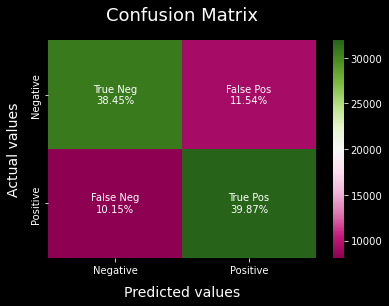

In [205]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
a, f1 = evaluating.EvaluatingModel(BNBmodel,X_test,y_test,font)
acc.append(a)

# Support Vector Machine

A support vector machine (SVM) 
* is a supervised machine learning model 
* that uses classification algorithms 
* for two-group classification problems.

After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text.

Advantages:
Compared to newer algorithms like neural networks, they have two main advantages: 
* higher speed 
* better performance 
* with a limited number of samples (in the thousands). This makes the algorithm very suitable for text classification problems, where it’s common to have access to a dataset of at most a couple of thousands of tagged samples.

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     39989
           1       0.77      0.80      0.79     40011

    accuracy                           0.78     80000
   macro avg       0.78      0.78      0.78     80000
weighted avg       0.78      0.78      0.78     80000



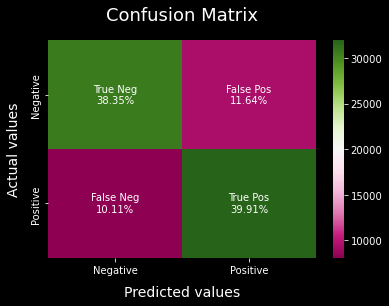

In [206]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
ab, f12 = evaluating.EvaluatingModel(SVCmodel,X_test,y_test,font)
acc.append(ab)

# Logistic Regression

Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on. 
Logistic regression makes use of the sigmoid function which outputs a probability between 0 and 1. The sigmoid function with some weight parameter θ and some input x^{(i)}x(i) is defined as follows:-h(x^(i), θ) = 1/(1 + e^(-θ^T*x^(i)).The sigmoid function gives values between -1 and 1 hence we can classify the predictions depending on a particular cutoff.

              precision    recall  f1-score   support

           0       0.81      0.78      0.79     39989
           1       0.79      0.81      0.80     40011

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



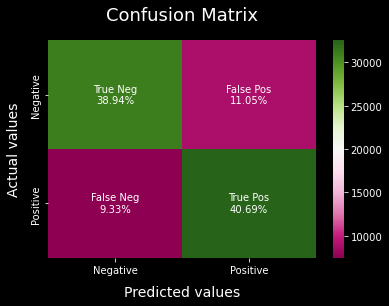

In [207]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
ac, f13 = evaluating.EvaluatingModel(LRmodel,X_test,y_test,font)
acc.append(ac)

# Q3: Plot a graph to study the accuracy and f1-score of these models, and then choose the best model.

Creating a DataFrame to store all the accuracies

In [208]:
acc_dict = {'model':['Bernoulli Naive Bayes','Support Vector Machine','Logistic Regression'],'accuracy': acc}

In [209]:
acc_df = pd.DataFrame(acc_dict)

In [210]:
acc_df

,model,accuracy
0,Bernoulli Naive Bayes,78.31250
1,Support Vector Machine,78.25375
2,Logistic Regression,79.62625


# Plotting the accuracies for all model

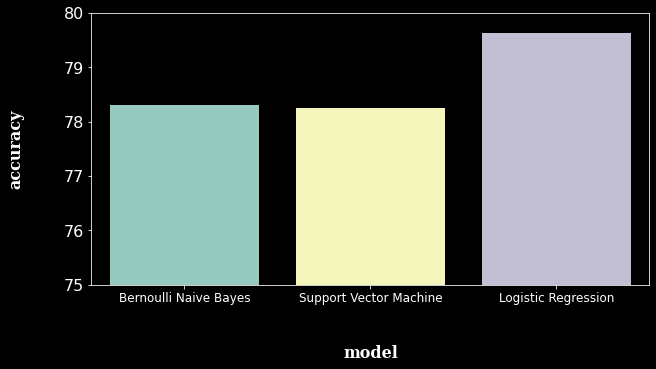

In [211]:
plt.figure(figsize=(10,5))
plt.xlabel('Model',fontdict=font,labelpad=40)
plt.ylabel('Accuracy',fontdict=font,labelpad=40)
plt.xticks(fontsize=12)
plt.yticks(fontsize=16)
plt.ylim([75,80])
sns.barplot(x=acc_df['model'], y=acc_df['accuracy'])
plt.show()

Creating a DataFrame for all the f1 scores across various models

In [253]:
df_f1 = pd.concat([f1,f12,f13],axis=1)

In [254]:
df_f1

,f1 score,f1 score,f1 score
0,0.78,0.78,0.79
1,0.79,0.79,0.80


In [255]:
df_f1.columns = ['NB f1','SVC f1','LR f1']

In [256]:
df_f1

,NB f1,SVC f1,LR f1
0,0.78,0.78,0.79
1,0.79,0.79,0.80


In [257]:
df_f1_0=df_f1.iloc[0]
df_f1_1=df_f1.iloc[1]

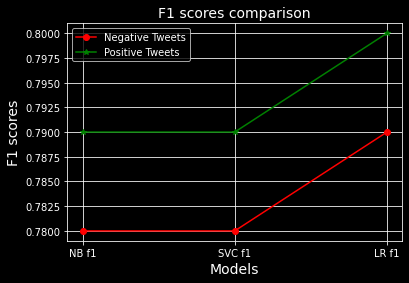

In [258]:
import matplotlib.pyplot as plt
xAxis=['NB f1','SVC f1','LR f1']
yAxis=df_f1_0
yAxis1=df_f1_1
plt.plot(xAxis,yAxis,color='red',marker='o',label='Negative Tweets')
plt.plot(xAxis,yAxis1,color='green',marker='*',label='Positive Tweets')
plt.title('F1 scores comparison',fontsize=14)
plt.xlabel('Models',fontsize=14)
plt.ylabel('F1 scores',fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Chosen Model: Logistic Regression

# Q4: Explain in the brief why you have chosen this model. 

From the above accuracy results, we can see that the Logistic Regression algorithm has performed relatively well as compared to the Naive Bayes algorithm. This can be due to the fact that the Logistic Regression algorithm doesn’t make as many assumptions as that of the Naive Bayes algorithm.
* Logistic regression is a good model because it trains quickly even on large datasets and provides very robust results.

* It offers the direction of association (positive or negative)

* Doesn't make any assumptions about the distribution of classes, Less prone to overfitting in low dimensional datasets

* Logistic regression is Simple to understand, easy to implement, and efficient to train


* Logistic regression is useful for this as it uses a sigmoid function to output a probability between zero and one.


Y = 1 / 1+e -z  (sigmoid function)


* Logistic regression is a supervised machine learning technique for classification problems.The goal of the model is to learn and approximate a mapping function f(Xi) = Y from input variables {x1, x2, xn} to output variable(Y).

# Q5: Pick any 3 tweets of each type and perform the predictions using your final model.

In [216]:
df.head()

,Target,User,Text,Day
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon
1,0,scotthamilton,is upset that he can't update his Facebook by ...,Mon
2,0,mattycus,@Kenichan I dived many times for the ball. Man...,Mon
3,0,ElleCTF,my whole body feels itchy and like its on fire,Mon
4,0,Karoli,"@nationwideclass no, it's not behaving at all....",Mon


In [217]:
df_pos = df[df['Target']==1]

In [218]:
df_pos = df_pos.sample(n=3,random_state=15)

In [219]:
pos_text = df_pos['Text'].tolist()

In [220]:
pos_text

["Goodnight twitted I'm happy again I thought I'd be sad , nice and clear now ",
 '@sujal Keep watching! Laker Nation thanks you. ',
 '@bmanley Meh! If a place could be considered hell, I have probably been there to do free software! ']

In [223]:
pos_df = dictionaries.predict(vectoriser,LRmodel, pos_text)

In [224]:
pos_df

,text,sentiment
0,Goodnight twitted I'm happy again I thought I'...,Positive
1,@sujal Keep watching! Laker Nation thanks you.,Positive
2,@bmanley Meh! If a place could be considered h...,Positive


In [243]:
df_neg = df[df['Target']==0]

In [244]:
df_neg = df_neg.sample(n=3,random_state=20)

In [245]:
neg_text = df_neg['Text'].tolist()

In [246]:
neg_text

['my wrist is sprained thanxs to mitchell myles ',
 "@Sam_Bartlett i'm going to be so upset if i get outbid at the last minute ",
 'dinner with tome.. then studying all night ']

In [247]:
neg_df = dictionaries.predict(vectoriser,LRmodel, neg_text)

In [248]:
neg_df

,text,sentiment
0,my wrist is sprained thanxs to mitchell myles,Negative
1,@Sam_Bartlett i'm going to be so upset if i ge...,Negative
2,dinner with tome.. then studying all night,Negative
